In [1]:
from kitaev import *
from scipy.misc import derivative as dif
from scipy.integrate import quad

In [2]:
t=1
N_global = 50
d_global = 2
mu1 = 0 * t 
delta1 = 0.05 * t 
t1 = 1 * t 


var_mu = np.linspace(-3, 3, 50)  
var_w = np.linspace(1e-2,1,50)
Gs_odd = []
Gs_even = []

delta_amount =  1E-5


energiesv2 = []
zero_modes_nums = []
pi_modes_nums = []

for j in tqdm(range(len(var_mu))):
    h_1 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=var_mu[j]), v=offsite(_delta=delta1, _t=t1))

    eval, evec = la.eigh(h_1.lattice_hamiltonian())

    eval = eval.real
    energiesv2.append(np.sort([(-1) ** n * val for n, val in enumerate(np.sort(np.abs(eval)))]))
    evec_inv = la.inv(evec)
    G_odd = []
    #G_even = []
    
    for w in var_w:
        
        delta_positive = (w + delta_amount * 1j) 
        delta_negative = (-w - delta_amount * 1j)
    
        G_pos = np.diag(1/(delta_positive - eval))
        G_neg = np.diag(1/(delta_negative - eval))
        G_odd.append(evec @ (G_pos - G_neg) @ evec_inv / 2)
        #G_even.append(evec @ (G_pos + G_neg) @ evec_inv / 2)
    
    #Gs_even.append(G_even)
    Gs_odd.append(G_odd)
    modes_ind,cnt_modes = check_modes(eval, 0)
    zero_modes_nums.append(cnt_modes)
    modes_ind,cnt_modes = check_modes(eval, 1)
    pi_modes_nums.append(cnt_modes)
    pass

100%|██████████| 50/50 [00:01<00:00, 31.40it/s]


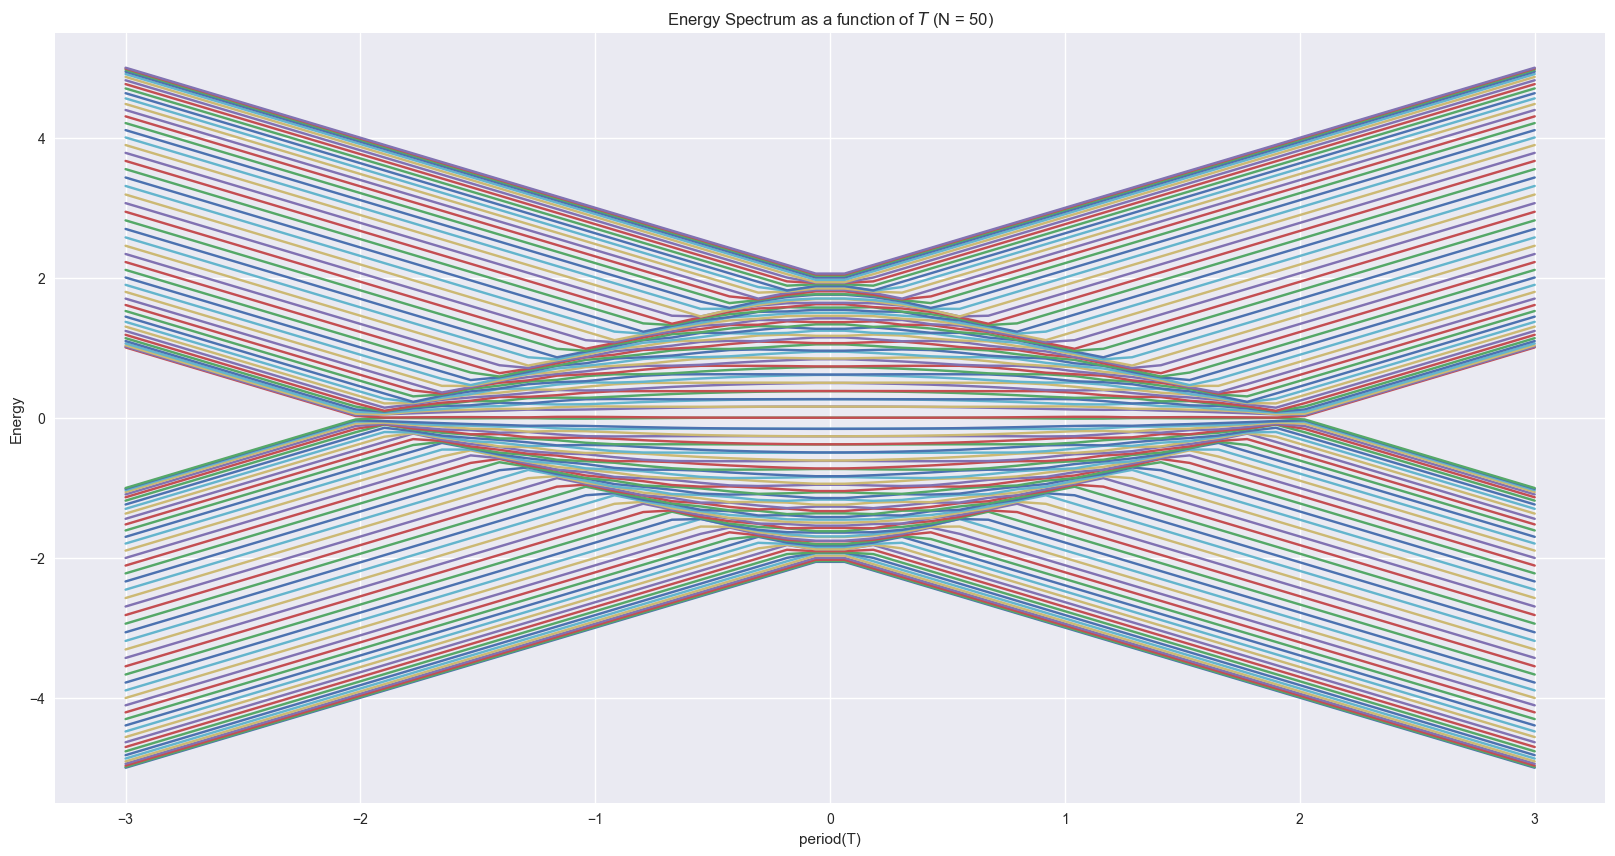

In [3]:
energiesv2 = np.array(energiesv2)
plt.title(f"Energy Spectrum as a function of $T$ (N = {N_global})")
for i in range(2*N_global):
    #plt.plot(var_T,energies[:,i]/np.pi)
    plt.plot(var_mu[:],energiesv2[:,i])
plt.ylabel('Energy')
plt.xlabel('period(T)')
plt.show()

C:\Users\eslam\AppData\Local\Temp\ipykernel_13988\1036582322.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(["seaborn-poster",'mystyle.mplstyle'])


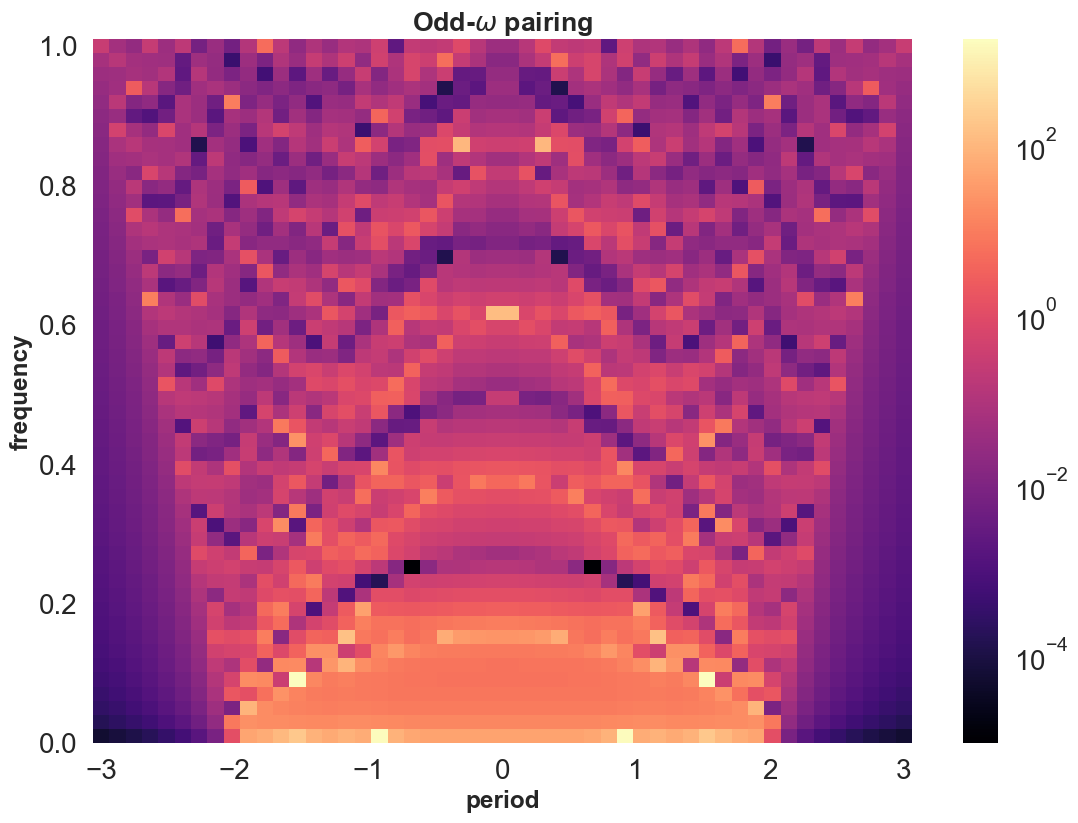

In [17]:
plt.style.use(["seaborn-poster",'mystyle.mplstyle'])
x, y = np.meshgrid(var_mu, var_w)
f_odd = np.zeros((len(var_w),len(var_mu)),dtype =complex)
for i in range(len(var_mu)):
    for j in range(len(var_w)):
        f_odd[j,i] = np.trace(Gs_odd[i][j][0:N_global:2,1:N_global+1:2])

fig = plt.figure()
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 

cp = plt.pcolormesh(x, y, (np.abs(f_odd.real)), cmap='magma', norm = 'log')
plt.colorbar(cp)

ax.set_title('Odd-$\omega$ pairing')
ax.set_xlabel('period')
ax.set_ylabel('frequency')
plt.show()

In [5]:

for j in tqdm(range(len(var_mu))):
    h_1 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=var_mu[j]), v=offsite(_delta=delta1, _t=t1))
    eval, evec = la.eigh(h_1.lattice_hamiltonian())
    f_odd = [(Gs_odd[j][50][0+n*d_global,1+n*d_global].imag) for n in range(N_global)]
    plt.title(f"edge odd-w pairing inside the bulk at $T =${var_mu[j]} ")
    plt.plot(range(N_global),np.abs(f_odd))
    plt.ylabel('odd-w amplitude at w = pi')
    plt.xlabel('$lattice site$')
    #plt.yscale('log')
    plt.legend()
    plt.show()
    smol = 1E-4
    zero_modes = plot_modes(eval,evec,0,e_threshold=smol)


  0%|          | 0/50 [00:00<?, ?it/s]


IndexError: list index out of range

In [ ]:

for j in tqdm(range(len(var_mu))):
    f_odd = [(Gs_odd[j][i][0,1]) for i in range(len(var_w))]
    plt.title(f"edge odd-w pairing at $T =${var_mu[j]} as a function of frequency ")
    plt.plot(var_w,(f_odd))
    plt.ylabel('odd-w amplitude (log scale)')
    plt.xlabel('$frequency$')
    #plt.yscale('log')
    plt.legend()
    plt.show()


In [6]:



def winding_number(_h,gamma,k_steps = 100):
    _var_k = np.linspace(-np.pi,np.pi,k_steps)
    delta_k = 2*np.pi/(k_steps)
    winding = 0
    _y =lambda k: (-1j/4*np.pi)*np.trace(gamma@la.inv(_h(k))@(dif(_h,k,dx=1/k_steps)))
    _yreal = lambda k: np.real(_y(k))
    _yimag = lambda k: np.imag(_y(k))
    #for k in _var_k:
    #    winding += (1j/4*np.pi)*np.trace(gamma@la.inv(_h(k))@(_h(k+delta_k)-_h(k)))
    real_integral = quad(_yreal,-np.pi,np.pi,limit=k_steps)
    imag_integral = quad(_yimag,-np.pi,np.pi,limit=k_steps)
    return np.array(real_integral[0] + 1j*imag_integral[0])

windings = []
for j in tqdm(range(len(var_mu))):
    h_1 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=var_mu[j]), v=offsite(_delta=delta1, _t=t1))
    w = winding_number(h_1.k_space_hamiltonian,s_x,k_steps=100)
    windings.append(w)

  0%|          | 0/50 [00:00<?, ?it/s]C:\Users\eslam\AppData\Local\Temp\ipykernel_13988\2959865081.py:5: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  _y =lambda k: (-1j/4*np.pi)*np.trace(gamma@la.inv(_h(k))@(dif(_h,k,dx=1/k_steps)))
100%|██████████| 50/50 [00:02<00:00, 24.36it/s]


In [ ]:
print(windings)

c:\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


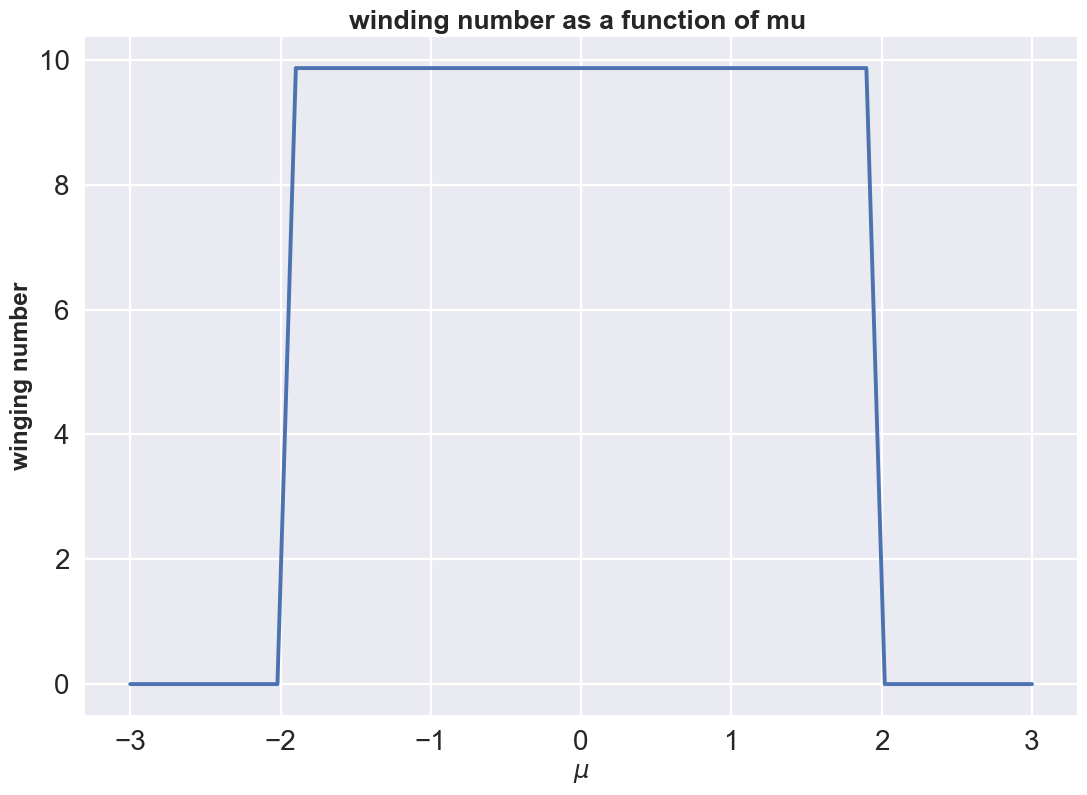

In [7]:
windings = np.array(windings)
plt.title("winding number as a function of mu ")
plt.plot(var_mu,(windings))
plt.ylabel('winging number')
plt.xlabel('$\mu$')
#plt.yscale('log')
plt.legend()
plt.show()


In [8]:


windings = []
for i in tqdm(range(len(var_mu))):
    winding = []
    h_1 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=var_mu[i]), v=offsite(_delta=delta, _t=t1))
    for j in range(len(var_w)):
        z = (var_w[j] + 1j*delta_amount)
        #z = (var_w[j]* 1j)
        w = winding_number(lambda x: (z*s_0-h_1.k_space_hamiltonian(x)),s_x,k_steps=50)
        winding.append(w/z)
    windings.append(winding)
windings = np.array(windings)

  0%|          | 0/50 [00:00<?, ?it/s]C:\Users\eslam\AppData\Local\Temp\ipykernel_13988\2959865081.py:5: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  _y =lambda k: (-1j/4*np.pi)*np.trace(gamma@la.inv(_h(k))@(dif(_h,k,dx=1/k_steps)))
  2%|▏         | 1/50 [00:02<02:07,  2.61s/it]C:\Users\eslam\AppData\Local\Temp\ipykernel_13988\2959865081.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be u

In [ ]:
print(windings)

C:\Users\eslam\AppData\Local\Temp\ipykernel_13988\462888587.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(["seaborn-poster",'mystyle.mplstyle'])


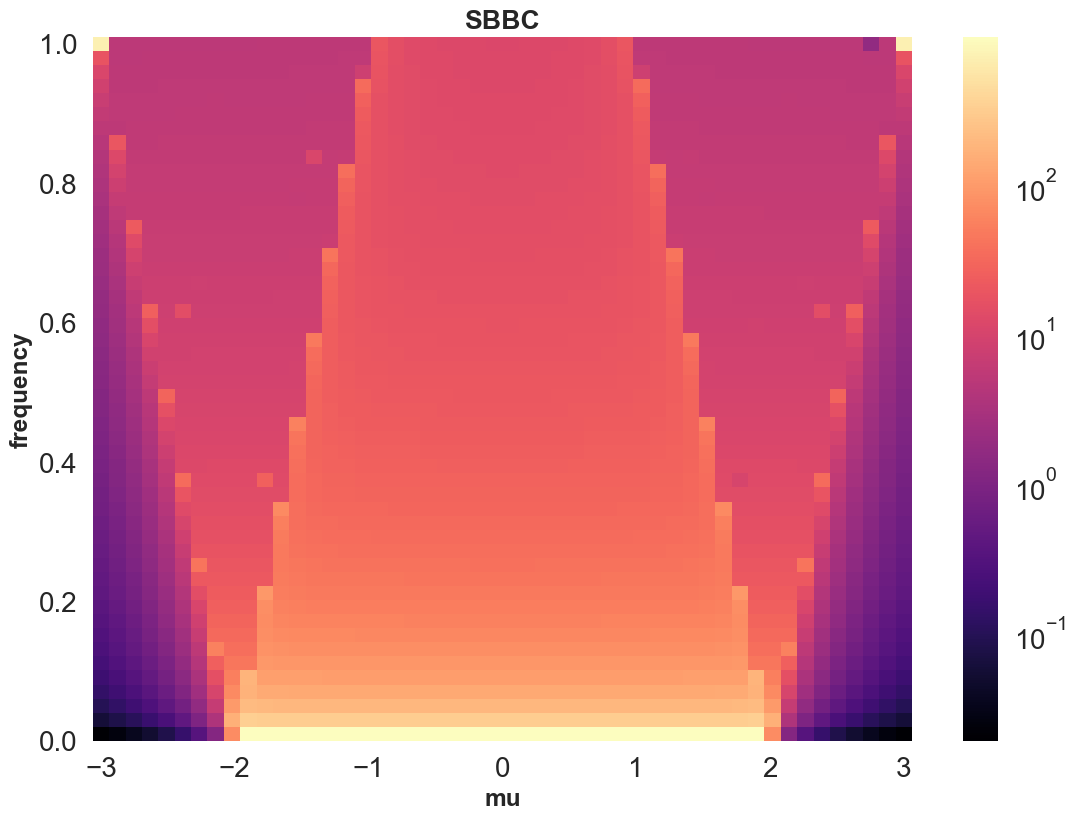

In [14]:
plt.style.use(["seaborn-poster",'mystyle.mplstyle'])
x, y = np.meshgrid(var_mu, var_w)
windings2d = np.zeros((len(var_w),len(var_mu)),dtype=complex)
for i in range(len(var_mu)):
    for j in range(len(var_w)):
        windings2d[j,i] = windings[i,j]

fig = plt.figure()
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 

cp = plt.pcolormesh(x, y, np.abs(windings2d.real), cmap='magma'
                    ,norm = 'log'
                    )
plt.colorbar(cp)

ax.set_title('SBBC')
ax.set_xlabel('mu')
ax.set_ylabel('frequency')
plt.show()

In [ ]:
def f(x): return 1/(x**2-1)
windings = np.array(windings)
plt.title("winding number as a function of frequency ")
plt.plot(var_w,(windings)/10)
plt.plot(var_w,[-f(w) for w in var_w],label='analytical answer')

plt.ylabel('winging number')
plt.xlabel('$\omega$')
#plt.yscale('log')
plt.legend()
plt.show()


In [ ]:
print(h_1.k_space_hamiltonian(np.pi/2))

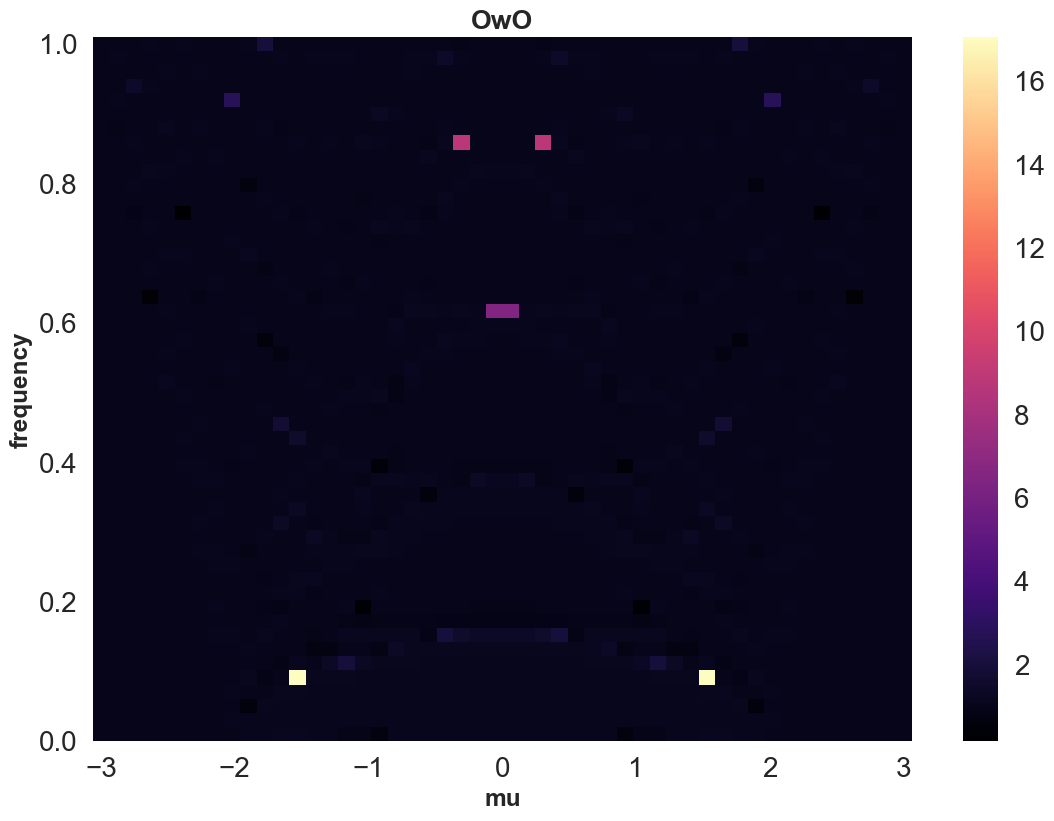

In [36]:
difference = np.abs(f_odd.real - windings2d.real)/np.abs(windings2d.real)

fig = plt.figure()
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 

cp = plt.pcolormesh(x, y, np.abs(difference.real), cmap='magma'
                    #,norm = 'log'
                    )
plt.colorbar(cp)

ax.set_title('OwO')
ax.set_xlabel('mu')
ax.set_ylabel('frequency')
plt.show()

In [32]:
print(difference)

[[0.00277834 0.0029288  0.00311815 ... 0.00311815 0.0029288  0.00277834]
 [0.00277861 0.00292917 0.0031187  ... 0.0031187  0.00292917 0.00277861]
 [0.00277915 0.00292992 0.00311979 ... 0.00311979 0.00292992 0.00277915]
 ...
 [0.00345781 0.00356662 0.00812497 ... 0.00812497 0.00356662 0.00345781]
 [0.00356697 0.01308589 0.01014299 ... 0.01014299 0.01308589 0.00356697]
 [0.00028835 0.01050367 0.00510005 ... 0.01519567 0.01050367 0.00028835]]
